In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils.np_utils import to_categorical

from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras import layers

from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU,Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten,GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

from keras.models import Model
from keras.optimizers import RMSprop
plt.style.use('fivethirtyeight')


In [9]:
data = pd.read_excel('/content/drive/My Drive/4-hate_speech_mlma_ar_dataset.xlsx')
print("Sample from dataset",data.info())


FileNotFoundError: ignored

In [ ]:
data.head()

,tweet,sentiment,directness,annotator_sentiment,target,group
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,gender,individual
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,other,other
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,other,individual
3,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,origin,other
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,origin,other


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.isna().sum()

tweet                  8
sentiment              0
directness             0
annotator_sentiment    0
target                 0
group                  0
dtype: int64

In [ ]:
data.shape

(3353, 6)

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape

(3345, 6)

In [ ]:
data["tweet"].duplicated().sum()

12

In [ ]:
bool_series = data["tweet"].duplicated() 
data[bool_series][:12]

,tweet,sentiment,directness,annotator_sentiment,target,group
253,تحمل اللاجئون السوريون شدة البرد والحر,normal,direct,sadness,origin,refugees
803,فتوى جديدة من #العراق يجوز شرب بول البعير وبول...,abusive_disrespectful,indirect,indifference_disgust,origin,other
1309,على مهلك خدينك بحلمك لوين يا رامز لجوا له ولي ...,offensive,indirect,indifference,origin,other
1696,يبدو أنّك تحت تأثير بول البعير,abusive_disrespectful,direct,indifference,origin,individual
1823,في الزلفي بايرة المرأة التي لم تتزوج أو التي ل...,offensive,indirect,indifference,other,women
2096,معاك ريال تسوين ريال,disrespectful,indirect,sadness,other,individual
2122,وانتي متبرجة مثيرة للشفقة,hateful_disrespectful_normal,direct,indifference,other,individual
2175,ما بدي كون متطفّل,normal,direct,indifference,other,other
2263,لا للتصنيف عندما يتوقف تصنيف التي لم تتزوج بال...,normal,indirect,shock,gender,women
2519,مع إني ضد الشتيمة,normal,direct,indifference,origin,individual


In [ ]:
data.loc[data['tweet'] == "تحمل اللاجئون السوريون شدة البرد والحر"]

,tweet,sentiment,directness,annotator_sentiment,target,group
151,تحمل اللاجئون السوريون شدة البرد والحر,normal,direct,sadness_indifference,origin,refugees
253,تحمل اللاجئون السوريون شدة البرد والحر,normal,direct,sadness,origin,refugees


In [ ]:
data.shape

(3345, 6)

In [ ]:
data.drop_duplicates(subset=['tweet'],inplace=True)

In [ ]:
len(data.sentiment.unique())

36

In [ ]:
data.sentiment.value_counts()

offensive                                          946
normal                                             907
hateful                                            459
abusive_disrespectful                              203
abusive_hateful                                    168
disrespectful                                      165
disrespectful_normal                               103
abusive_normal                                      81
abusive_offensive                                   76
hateful_disrespectful                               40
offensive_disrespectful                             32
abusive_offensive_hateful_disrespectful_normal      23
offensive_normal                                    21
abusive                                             19
hateful_normal                                      15
fearful                                             12
offensive_hateful                                   11
abusive_offensive_disrespectful_hateful_normal      10
fearful_ab

In [ ]:
data_df=data[['tweet', 'sentiment']]

In [ ]:
data_df.shape

(3333, 2)

In [ ]:
data_df["sentiment"] = data_df.apply(lambda x: "Not-HS" if x["sentiment"] == 'normal' else "HS",axis =1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_df.head()

,tweet,sentiment
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,HS
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,HS
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,HS
3,@user @user انا اوافقك بخصوص السوريين و العراق...,Not-HS
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,Not-HS


In [ ]:
data_df.sentiment.value_counts()

HS        2426
Not-HS     907
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Hate and Normal tweets')

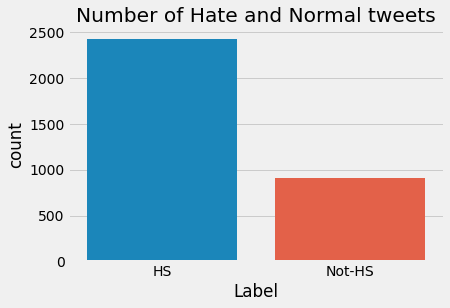

In [ ]:


sns.countplot(data_df.sentiment)
plt.xlabel('Label')
plt.title('Number of Hate and Normal tweets')

In [ ]:


le = LabelEncoder()   
data_df['sentiment']= le.fit_transform(data_df['sentiment']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_df.head()

,tweet,sentiment
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,0
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,0
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,0
3,@user @user انا اوافقك بخصوص السوريين و العراق...,1
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,1


In [ ]:
val_df = data_df.sample(frac=0.1, random_state=1007)
train_df = data_df.drop(val_df.index)
test_df = train_df.sample(frac=0.1, random_state=1007)
train_df.drop(test_df.index, inplace=True)
(train_df.shape,val_df.shape,test_df.shape)

((2700, 2), (333, 2), (300, 2))

In [ ]:
x_train=train_df['tweet']
y_train=train_df['sentiment']
x_val=val_df['tweet']
y_val=val_df['sentiment']

In [ ]:
x_train.head()

0    صلاة الفجر خير لك من ترديد بول البعير وسبي الن...
1    صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...
2    طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...
3    @user @user انا اوافقك بخصوص السوريين و العراق...
5    ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url
Name: tweet, dtype: object

In [ ]:

#prepare a tokenizer for abstract on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

#convert abstract sequences into integer sequences
x_train   =   x_tokenizer.texts_to_sequences(x_train) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_train    =   pad_sequences(x_train, padding='post') 
x_val     =   pad_sequences(x_val, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1
print("Size of vocabulary in x = {}".format(x_voc_size))

Size of vocabulary in x = 12366


In [ ]:
x_train[:1]

array([[1595, 1596, 1057,   87,    3, 3185,    4,    5, 3186,  282, 3187,
        3188, 3189, 3190, 3191, 3192,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [ ]:

x_train.shape

(2700, 29)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(x_voc_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

In [ ]:



model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1582848   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,727,170
Trainable params: 1,727,170
Non-trainable params: 0
______________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

history=model.fit(x_train, y_train, epochs=50, batch_size=128,callbacks=[es])


Epoch 1/50
22/22 [==============================] - 3s 140ms/step - loss: 4.4583 - accuracy: 0.6067
Epoch 2/50
22/22 [==============================] - 3s 136ms/step - loss: 3.0501 - accuracy: 0.4844
Epoch 3/50
22/22 [==============================] - 3s 135ms/step - loss: 2.9510 - accuracy: 0.5044
Epoch 4/50
22/22 [==============================] - 3s 135ms/step - loss: 2.6436 - accuracy: 0.4463
Epoch 5/50
22/22 [==============================] - 3s 136ms/step - loss: 2.4661 - accuracy: 0.4844
Epoch 6/50
22/22 [==============================] - 3s 137ms/step - loss: 1.8255 - accuracy: 0.4189
Epoch 7/50
22/22 [==============================] - 3s 139ms/step - loss: 1.1852 - accuracy: 0.3656
Epoch 8/50
22/22 [==============================] - 3s 136ms/step - loss: 0.8079 - accuracy: 0.3400
Epoch 9/50
22/22 [==============================] - 3s 135ms/step - loss: 0.5621 - accuracy: 0.3444
Epoch 10/50
22/22 [==============================] - 3s 136ms/step - loss: 0.5120 - accuracy: 0.2989

In [ ]:
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.optimizers import Adam

model3= Sequential()
model3.add(Embedding(x_voc_size,128,input_length= x_train.shape[1]))
model3.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Dropout(0.25))
model3.add(GRU(128,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2,activation='softmax'))
model3.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model3.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           1582848   
_________________________________________________________________
conv1d (Conv1D)              (None, 29, 64)            24640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
gru (GRU)                    (None, 14, 128)           74496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

history=model3.fit(x_train, y_train, epochs=50, batch_size=128,callbacks=[es])


Epoch 1/50
22/22 [==============================] - 2s 71ms/step - loss: 0.6933 - accuracy: 0.4885
Epoch 2/50
22/22 [==============================] - 2s 70ms/step - loss: 0.6931 - accuracy: 0.6181
Epoch 3/50
22/22 [==============================] - 2s 69ms/step - loss: 0.6931 - accuracy: 0.5526
Epoch 4/50
22/22 [==============================] - 2s 69ms/step - loss: 0.6931 - accuracy: 0.5919
Epoch 5/50
22/22 [==============================] - 2s 70ms/step - loss: 0.6931 - accuracy: 0.5596
Epoch 6/50
22/22 [==============================] - 2s 70ms/step - loss: 0.6931 - accuracy: 0.5867
Epoch 00006: early stopping
